<h1 style="text-align:center">Winning Impact: Exploring Lebron James' Impact on Winning For His Team Over 20 years of His NBA career</h1>

<img src="https://assets-cms.thescore.com/uploads/image/file/420662/cropped_goat_bron.jpg?ts=1601531159">

Image by :https://www.thescore.com/nba/news/2028787

<h2> 1. Aims, Objectives, and Background

<h3>1.1 Introduction</h3>

In the past 30 years the world of basketball have experienced breakthroughs in the areas of data analytics, machine learning, and data engineering which has allowed for the tracking, analysis and application of data in the NBA. Data of every sort is now not just tracked but also made freely available to the public, allowing for more accurate analysis of a player's abilities and impact.[1] 

The player that this project will be focusing on is Lebron Raymond James Sr. This choice was inspired by a video, made by Youtube channel: "Thinking Basketball", discussing Lebron's evolution in his playstyle over his 20 year career [2]. Despite his age, he continues to be widely considered by both fellow peers and journalists as one of the top players in the league. Lebron James is considered to be one of the greatest basketball players of all time, making him a relevant figure to explore. More than that however, is the large sample size of game data due to his long career, having now played on three different teams across over 1400 games [3]. Couple the reasons above with him being my personal favorite player, and this amalgemation of factors resulted in me basing this project on exploring his impact on the most important thing in competitive sports, winning.

While measuring the "value" and "impact" of a player has been attempted to be measured through different mathematical metrics, this project will aim to do so from a different perspective. These existing metrics typically measure player performance over a game or season, whereas I will attempt to combine both performance and team result. 

<h3>1.2 Aims and Objectives</h3>

<ul>
    <li>How do Lebron's teams play with and without him?</li>
        <ul>
            <li>measuring margin of victory</li>
            <li>win percentage</li>
            <li>basic box score numbers like points, turnovers, assists, etc.</li>
        </ul>
    <li>How has his impact changed over time?</li>
        <ul>
            <li>number of total wins over time</li>
            <li>measuring his availability - nubmer of games missed</li>
        </ul>
    <li>What factors affect his impact most?</li>
        <ul>
            <li>Does the support of the crowd?-look at home vs away stats</li>
            <li>How many minutes a game is he most impactful at?</li>
            <li>Is his impact more felt with better teammates? - subjective assesment of his teams</li>
        </ul>
</ul>

My aims for this project to achieve the following objectives are:
<ol>
    <li>Decide the data that I need in order to best ananlyze Lebron's impact on winning</li>
    <li>Scrape the data from a website which allows for the open usage of their data for free</li>
    <li>Clean the collected data by removing unneeded columns</li>
    <li>Merge the different data frames into one larger dataframe more suitable for analysis</li>
    <li>Transform the dataframe by converting types, replacing nan values, and creating new columns</li>
    <li>Carry out different data analysis techniques to answer the questions above through different pandas, numpy and matplotlib methods</li>

<h3>1.3 Data</h3>                                                                                                                                                                                                                                                                                                                                                                                                                         

<h4>1.3.1 Data source</h4>

The data source that I will be using for this project is from the website basketball reference. Basketball reference is a basketball based search engine which records statistical information for teams, players, coaches all available for free use. Basketball reference is highly popular, trusted, and most importantly holds a vast amount of player and team data over the entire history of the NBA. 

Specifically I will be using the game logs, which are year by year logs of every game played by a certain team or player which includes that game's opponents, date, and box score statistics. 

<h4>1.3.2 Potential Limitations</h4>

<b>Difference in opponent Quality</b>

The difference in opponent quality Lebron has faced will not be accounted for in this dataset. This can be seen as a limitation as who an opponent has guarding Lebron, their strategy to play against him, or simply just the quality of players the opposing team has, will change the how Lebron plays and impacts his team. 

<b>Measuring teammate quality</b>

Over his career Lebron has had numerous different teammates of varying quality, which inevitably impacts Lebron's own performance, whether due to on or off the court activities. The data collected does not measure this due to the incomprhensibly large amount of data needed to be gathered and analyzed to measure the quality and impact of each and everyone of Lebron's teammates.

<b>Evolution of the NBA</b>

The NBA has changed drastically from when Lebron's first to 20th year in the league. However this data set does not account for the change in opponent quality, parity, and other league trends, all of which could affect the impact that Lebron has on his teams.

<h4>1.3.3 Exclusion of other datasets</h4>

There are other datasets such as the advanced game logs, or as mentioned above the quality of Lebron's teammates or opponents, that were not used in this project. The reason being that they would only add noise and added complexity to the project while only marginally improving the ability to answer the project's question. The data provided in the game logs used is more than enough to give an accurate picture of Lebron's impact on winning.

I will also only be using regular season games in this project, as Lebron James has not missed a single playoff game in his entire career making it difficult to measure his impact in this setting, and it is excluded as playoff and regular season basketball is vastly different. 

Finally, for the sake of consistency, I will only be using data up to his 20th year, as while I'm working on this project Lebron is playing his 21st season, and so I will be excluding that from the data set. This is due to the fact that as he plays more data will be added, and depending on the time when this project is run, it could change the numbers and statistics refered to in the static markdown text in the notebook.

<h3>1.4 Ethical Considerations</h3>

<h4>1.4.1 Data scraping </h4> 

Basketball reference states in their terms of use that "Our guiding principles are that (1) sharing, using, modifying, repackaging, or publishing data found on individual SRL webpages is welcomed, whether for commercial or non-commercial purposes,"[4]. Thus I can confidently say that the use of their data in this project is within the ethical bounds set by the website.

<b>1.4.2 Intellectual property in the form of images or logos</b>

All logos and images used in this notebook will be properly credited to either the organization that the logo belongs to or the artist/website the image originates from.

### 2. Webscraping and Creation of Dataframes

#### Importing the necesarry modules 

<ul>
    <li>pandas: creation and manipulation of dataframes</li>
    <li>beautiful soup: web scraping</li>
    <li>requests: getting the content of a website through a url</li>
    <li>numpy: manipulation of arrays</li>
    <li>matplotlib: displaying and presenting data and graphs</li>
</ul>

In [70]:
#import libraries and modules all in one cell
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

#### Functions to Web Scrape Data

requests the URL, and returns an initialized BeautifulSoup object that parses the text requested from the given URL

In [2]:
def get_soup(link):
    r = requests.get(link)
    if r.status_code != 200:
        raise Exception("Website didn't respond successfully")
    else:
        data = r.text
        soup = BeautifulSoup(data, "html.parser")
    return soup

returns an array of rows which contains the regular season games in the gamelog

In [3]:
def get_rows(soup):
    rows = []
    for t in soup.find_all("tr"):
        if t.has_attr('id'):
            rows.append(soup.find_all(attrs={"id": t['id']})[0])
    return rows

returns a different link to the respective gamelogs based on the given year, as Lebron was on different teams on different years

In [4]:
def get_link(year):
    if year < 2011 or (year > 2014 and year < 2019):
        return f"https://www.basketball-reference.com/teams/CLE/{year}/gamelog/"
    elif year > 2010 and year < 2015:
        return f"https://www.basketball-reference.com/teams/MIA/{year}/gamelog/"
    else:
        return f"https://www.basketball-reference.com/teams/LAL/{year}/gamelog/"        

#### 2.1 Creating the Team Games Dataframe

Initializes the games variable as an empty dictionary 

In [5]:
games = {}

Fill it with web scraped data from Basketball Reference game logs of Lebron's teams over the years

In [6]:
for year in range(2004,2024):
    link = get_link(year)
    soup = get_soup(link)
    rows = get_rows(soup)
    for row in rows:
        for data in row.find_all('td'):
            #initialize the key  as an empty array if it wasn't in the dictionary yet
            if data['data-stat'] not in games.keys():
                games[data['data-stat']] = []
                games['season'] = []
                games['team'] = []
            #appends the data stat to the corresponding key's array
            games[data['data-stat']].append(data.text)
            
        ##season and team are columns used to add information to the season that it was in 
        games['season'].append(f"{year - 1}-{year}")
        #and the team Lebron was playing in at the time
        games['team'].append(link[43:46])

Create the games dataframe through the games dictionary

In [7]:
## csv already created 
pd.DataFrame(games).to_csv('games.csv')

In [8]:
team_games_df = pd.read_csv('games.csv')

#### 2.2 Checking the Dataframe and Its Attributes

Check the first 5 rows of the dataframe

In [9]:
team_games_df.head()

,Unnamed: 0,game_season,season,team,date_game,game_location,opp_id,game_result,pts,opp_pts,...,opp_ft,opp_fta,opp_ft_pct,opp_orb,opp_trb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,0,1,2003-2004,CLE,2003-10-29,@,SAC,L,92,106,...,16,20,0.800,13,41,27,7,8,10,11
1,1,2,2003-2004,CLE,2003-10-30,@,PHO,L,86,95,...,27,38,0.711,11,43,16,8,7,12,15
2,2,3,2003-2004,CLE,2003-11-01,@,POR,L,85,104,...,22,29,0.759,8,38,27,7,3,12,22
3,3,4,2003-2004,CLE,2003-11-05,NaN,DEN,L,89,93,...,10,18,0.556,13,42,17,10,7,14,24
4,4,5,2003-2004,CLE,2003-11-07,@,IND,L,90,91,...,19,25,0.760,10,41,23,8,7,7,20


Check for null values

In [10]:
team_games_df.isna().values.any()

True

Check the column names 

In [11]:
team_games_df.columns

Index(['Unnamed: 0', 'game_season', 'season', 'team', 'date_game',
       'game_location', 'opp_id', 'game_result', 'pts', 'opp_pts', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'x', 'opp_fg', 'opp_fga',
       'opp_fg_pct', 'opp_fg3', 'opp_fg3a', 'opp_fg3_pct', 'opp_ft', 'opp_fta',
       'opp_ft_pct', 'opp_orb', 'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk',
       'opp_tov', 'opp_pf'],
      dtype='object')

#### 2.3 Modifying the Team Games Dataframe

Drop the "x" column as it is an empty column

In [12]:
team_games_df.drop(['x', 'Unnamed: 0'], axis=1, inplace=True)

check if x is still in the columns of the dataframe

In [13]:
team_games_df.columns

Index(['game_season', 'season', 'team', 'date_game', 'game_location', 'opp_id',
       'game_result', 'pts', 'opp_pts', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'opp_fg', 'opp_fga', 'opp_fg_pct', 'opp_fg3', 'opp_fg3a',
       'opp_fg3_pct', 'opp_ft', 'opp_fta', 'opp_ft_pct', 'opp_orb', 'opp_trb',
       'opp_ast', 'opp_stl', 'opp_blk', 'opp_tov', 'opp_pf'],
      dtype='object')

Changing the 'game_location' column' value to 'Home' and 'Away' 

In [14]:
#'@' is shorthand for "at" which means they played the game away
#use list comprehension here as a shorthand to make code more verbose
team_games_df['game_location'] = ['Away' if loc == '@' else 'Home' for loc in team_games_df['game_location']]

In [15]:
team_games_df['game_location']

0       Away
1       Away
2       Away
3       Home
4       Away
        ... 
1598    Away
1599    Away
1600    Away
1601    Home
1602    Home
Name: game_location, Length: 1603, dtype: object

Change the box score statistics to explicitly mention that it is the TEAM's stat. This will be important as later I will be merging this dataframe with Lebron's gamelogs which will also have identically named columns for box score statistics such as pts, fg, fga, etc.

In [16]:
team_games_df.columns

Index(['game_season', 'season', 'team', 'date_game', 'game_location', 'opp_id',
       'game_result', 'pts', 'opp_pts', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'opp_fg', 'opp_fga', 'opp_fg_pct', 'opp_fg3', 'opp_fg3a',
       'opp_fg3_pct', 'opp_ft', 'opp_fta', 'opp_ft_pct', 'opp_orb', 'opp_trb',
       'opp_ast', 'opp_stl', 'opp_blk', 'opp_tov', 'opp_pf'],
      dtype='object')

In [17]:
#iterates the index of the column names that need to changed relative to the columns list
for ind in range(7,25):
    #do so for every column except for column in position 8 as that column is 'opp_pts'
    if ind != 8:
        #renames the columns by adding "team_" in front of the existing name
        team_games_df.rename(columns=
                        {team_games_df.columns[ind]: "team_" + team_games_df.columns[ind]},
                       inplace=True)
team_games_df.columns

Index(['game_season', 'season', 'team', 'date_game', 'game_location', 'opp_id',
       'game_result', 'team_pts', 'opp_pts', 'team_fg', 'team_fga',
       'team_fg_pct', 'team_fg3', 'team_fg3a', 'team_fg3_pct', 'team_ft',
       'team_fta', 'team_ft_pct', 'team_orb', 'team_trb', 'team_ast',
       'team_stl', 'team_blk', 'team_tov', 'team_pf', 'opp_fg', 'opp_fga',
       'opp_fg_pct', 'opp_fg3', 'opp_fg3a', 'opp_fg3_pct', 'opp_ft', 'opp_fta',
       'opp_ft_pct', 'opp_orb', 'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk',
       'opp_tov', 'opp_pf'],
      dtype='object')

#### 2.4 Creation of Lebron's games Dataframe

Initialize the variable lebron as an empty dictionary

In [18]:
lebron = {}

Fill it with web scraped data from Basketball Reference game logs of LeBron over the years

In [19]:
for year in range(2004,2024):
    rows = []
    soup = get_soup(f"https://www.basketball-reference.com/players/j/jamesle01/gamelog/{year}")
    counter = 0
    #skip all the rows without an id before the first row with an id
    for t in soup.find_all('tr'):
        if t.has_attr('id'):
            break;
        #use the counter as a way of finding the index where the first row has an id
        counter += 1
    #append the row to the rows array if it doesn't have the class attribute
    for ind in range(counter, len(soup.find_all('tr'))):
        if not soup.find_all('tr')[ind].has_attr('class'):
            rows.append(soup.find_all('tr')[ind])
    #iterate through every row
    for row in rows:
        #if the row is when he plays
        if row.has_attr('id'):
            #iterate through every data
            for data in row.find_all('td'):
                #if the key doesnt exist initialize it
                if data['data-stat'] not in lebron.keys():
                    lebron[data['data-stat']] = []
                #append the data
                lebron[data['data-stat']].append(data.text)
        #when he doesn't play
        else:
            #append the date from the row 
            lebron['date_game'].append(row.find(attrs={"data-stat": "date_game"}).text)
            lebron['age'].append(row.find(attrs={"data-stat": "age"}).text)
            #for every other key in the object
            keys = list(lebron.keys())
            #except date_game
            keys.remove('date_game')
            keys.remove('age')
            #make it NA
            for key in keys:
                lebron[key].append(None)    

In [20]:
##csv already created
pd.DataFrame(lebron).to_csv('lebron.csv')

In [21]:
lebron_df = pd.read_csv('lebron.csv')

In [22]:
lebron_df

,Unnamed: 0,game_season,date_game,age,team_id,game_location,opp_id,game_result,gs,mp,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus
0,0,1.0,2003-10-29,18-303,CLE,@,SAC,L (-14),1.0,42:50,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,1,2.0,2003-10-30,18-304,CLE,@,PHO,L (-9),1.0,40:21,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,2,3.0,2003-11-01,18-306,CLE,@,POR,L (-19),1.0,39:10,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,3,4.0,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1.0,41:06,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,4,5.0,2003-11-07,18-312,CLE,@,IND,L (-1),1.0,43:44,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,51.0,2023-04-02,38-093,LAL,@,HOU,W (+25),1.0,29:21,...,8.0,10.0,11.0,0.0,1.0,1.0,1.0,18.0,19.4,23.0
1599,1599,52.0,2023-04-04,38-095,LAL,@,UTA,W (+2),1.0,38:28,...,5.0,5.0,6.0,1.0,1.0,5.0,2.0,37.0,25.3,-7.0
1600,1600,53.0,2023-04-05,38-096,LAL,@,LAC,L (-7),1.0,35:06,...,8.0,8.0,7.0,1.0,1.0,6.0,0.0,33.0,26.4,-10.0
1601,1601,54.0,2023-04-07,38-098,LAL,NaN,PHO,W (+14),1.0,29:21,...,6.0,6.0,6.0,0.0,0.0,5.0,1.0,16.0,5.3,11.0


#### 2.5 Modifying the LeBron Dataframe

Drop certain columns that are redundant due to the team_games_df having them too, or is simply irrelevant to answering the question

In [23]:
lebron_df.drop(['game_season', "team_id", "opp_id", "game_result", "game_location", 'age', 'gs', 'Unnamed: 0'], axis=1, inplace=True)

In [24]:
lebron_df.columns

Index(['date_game', 'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct',
       'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'game_score', 'plus_minus'],
      dtype='object')

#### 2.6 Creating a merged dataframe from the team games dataframe and LeBron's dataframe

Merge the dataframe "right" so it preserves the information from the LeBron dataframe, and do so from a common column, 'date_game', which is present and identical in both dataframes

In [73]:
merged_df = pd.merge(team_games_df, lebron_df, on='date_game', how="right")

In [75]:
merged_df.head()

,game_season,season,team,date_game,game_location,opp_id,game_result,team_pts,opp_pts,team_fg,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus
0,1,2003-2004,CLE,2003-10-29,Away,SAC,L,92,106,40,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2,2003-2004,CLE,2003-10-30,Away,PHO,L,86,95,37,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3,2003-2004,CLE,2003-11-01,Away,POR,L,85,104,35,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4,2003-2004,CLE,2003-11-05,Home,DEN,L,89,93,33,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5,2003-2004,CLE,2003-11-07,Away,IND,L,90,91,36,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


Its not good practice to have null values in a data set as it interferes with calculations especially with how much numeric data there is, so before we replace null with 0, I'll use it to create a column to help decipher whether or not Lebron Played as its an important column for the research question

In [76]:
merged_df['LBPlayed'] = [0 if math.isnan(row) else 1 for row in merged_df['pts']]

Now that we have a column that tracks whether Lebron played in a particular game, I can fill the None values in the dataframe with 0 for easier calculation

In [78]:
merged_df = merged_df.fillna(0)

In [79]:
merged_df.isna().values.any()

False

Another thing to change before being able to analyze this data is the data types of merged_df

function to conveniently check the data types of each dataframe, while also printing the corresponding column

In [80]:
#reusable function to check a dataframe's datatypes
def checkDFDatatypes(df):
    for col in df.columns:
        print(col, type(merged_df[col][0]))

In [81]:
checkDFDatatypes(merged_df)

game_season <class 'numpy.int64'>
season <class 'str'>
team <class 'str'>
date_game <class 'str'>
game_location <class 'str'>
opp_id <class 'str'>
game_result <class 'str'>
team_pts <class 'numpy.int64'>
opp_pts <class 'numpy.int64'>
team_fg <class 'numpy.int64'>
team_fga <class 'numpy.int64'>
team_fg_pct <class 'numpy.float64'>
team_fg3 <class 'numpy.int64'>
team_fg3a <class 'numpy.int64'>
team_fg3_pct <class 'numpy.float64'>
team_ft <class 'numpy.int64'>
team_fta <class 'numpy.int64'>
team_ft_pct <class 'numpy.float64'>
team_orb <class 'numpy.int64'>
team_trb <class 'numpy.int64'>
team_ast <class 'numpy.int64'>
team_stl <class 'numpy.int64'>
team_blk <class 'numpy.int64'>
team_tov <class 'numpy.int64'>
team_pf <class 'numpy.int64'>
opp_fg <class 'numpy.int64'>
opp_fga <class 'numpy.int64'>
opp_fg_pct <class 'numpy.float64'>
opp_fg3 <class 'numpy.int64'>
opp_fg3a <class 'numpy.int64'>
opp_fg3_pct <class 'numpy.float64'>
opp_ft <class 'numpy.int64'>
opp_fta <class 'numpy.int64'>
opp_ft

Most of the columns that should be other data types are still strings, so I need to convert them to their proper data types. The first of these is the date_game, which should be a TimeStamp data type

In [82]:
merged_df['date_game'] = [pd.to_datetime(date) for date in merged_df['date_game']]
merged_df.isna().values.any()

False

In [83]:
checkDFDatatypes(merged_df)

game_season <class 'numpy.int64'>
season <class 'str'>
team <class 'str'>
date_game <class 'pandas._libs.tslibs.timestamps.Timestamp'>
game_location <class 'str'>
opp_id <class 'str'>
game_result <class 'str'>
team_pts <class 'numpy.int64'>
opp_pts <class 'numpy.int64'>
team_fg <class 'numpy.int64'>
team_fga <class 'numpy.int64'>
team_fg_pct <class 'numpy.float64'>
team_fg3 <class 'numpy.int64'>
team_fg3a <class 'numpy.int64'>
team_fg3_pct <class 'numpy.float64'>
team_ft <class 'numpy.int64'>
team_fta <class 'numpy.int64'>
team_ft_pct <class 'numpy.float64'>
team_orb <class 'numpy.int64'>
team_trb <class 'numpy.int64'>
team_ast <class 'numpy.int64'>
team_stl <class 'numpy.int64'>
team_blk <class 'numpy.int64'>
team_tov <class 'numpy.int64'>
team_pf <class 'numpy.int64'>
opp_fg <class 'numpy.int64'>
opp_fga <class 'numpy.int64'>
opp_fg_pct <class 'numpy.float64'>
opp_fg3 <class 'numpy.int64'>
opp_fg3a <class 'numpy.int64'>
opp_fg3_pct <class 'numpy.float64'>
opp_ft <class 'numpy.int64'>

Now I need to also convert the numerous columns which tracks intergers or floats but instead are represented as strings 

In [84]:
#iterates through every column in merged_df
for col in merged_df.columns:
    #use a try except block as some are unable to be integers
    try:
        merged_df[col] = merged_df[col].astype(int)
    except:
        #if so try converting them into a float
        try: 
            merged_df[col] = merged_df[col].astype(float)
        except:
        #if this doesn't work it is likely a column that is correctly a string, so continue to the next column
            continue
merged_df.isna().values.any()

False

In [85]:
checkDFDatatypes(merged_df)

game_season <class 'numpy.int32'>
season <class 'str'>
team <class 'str'>
date_game <class 'pandas._libs.tslibs.timestamps.Timestamp'>
game_location <class 'str'>
opp_id <class 'str'>
game_result <class 'str'>
team_pts <class 'numpy.int32'>
opp_pts <class 'numpy.int32'>
team_fg <class 'numpy.int32'>
team_fga <class 'numpy.int32'>
team_fg_pct <class 'numpy.int32'>
team_fg3 <class 'numpy.int32'>
team_fg3a <class 'numpy.int32'>
team_fg3_pct <class 'numpy.int32'>
team_ft <class 'numpy.int32'>
team_fta <class 'numpy.int32'>
team_ft_pct <class 'numpy.int32'>
team_orb <class 'numpy.int32'>
team_trb <class 'numpy.int32'>
team_ast <class 'numpy.int32'>
team_stl <class 'numpy.int32'>
team_blk <class 'numpy.int32'>
team_tov <class 'numpy.int32'>
team_pf <class 'numpy.int32'>
opp_fg <class 'numpy.int32'>
opp_fga <class 'numpy.int32'>
opp_fg_pct <class 'numpy.int32'>
opp_fg3 <class 'numpy.int32'>
opp_fg3a <class 'numpy.int32'>
opp_fg3_pct <class 'numpy.int32'>
opp_ft <class 'numpy.int32'>
opp_fta <

change the 3pt percentage and the ft percentage since they slip through the cracks

In [86]:
merged_df['fg3_pct'] = [float(tpct) if tpct != "" else 0.0 for tpct in merged_df['fg3_pct']]

In [87]:
merged_df['ft_pct'] = [float(fpct) if fpct != "" else 0.0 for fpct in merged_df['ft_pct']]

In [88]:
merged_df['plus_minus'] = [int(pm) if pm != "" else 0 for pm in merged_df['plus_minus']]

In [89]:
merged_df.isna().values.any()

False

In [90]:
checkDFDatatypes(merged_df)

game_season <class 'numpy.int32'>
season <class 'str'>
team <class 'str'>
date_game <class 'pandas._libs.tslibs.timestamps.Timestamp'>
game_location <class 'str'>
opp_id <class 'str'>
game_result <class 'str'>
team_pts <class 'numpy.int32'>
opp_pts <class 'numpy.int32'>
team_fg <class 'numpy.int32'>
team_fga <class 'numpy.int32'>
team_fg_pct <class 'numpy.int32'>
team_fg3 <class 'numpy.int32'>
team_fg3a <class 'numpy.int32'>
team_fg3_pct <class 'numpy.int32'>
team_ft <class 'numpy.int32'>
team_fta <class 'numpy.int32'>
team_ft_pct <class 'numpy.int32'>
team_orb <class 'numpy.int32'>
team_trb <class 'numpy.int32'>
team_ast <class 'numpy.int32'>
team_stl <class 'numpy.int32'>
team_blk <class 'numpy.int32'>
team_tov <class 'numpy.int32'>
team_pf <class 'numpy.int32'>
opp_fg <class 'numpy.int32'>
opp_fga <class 'numpy.int32'>
opp_fg_pct <class 'numpy.int32'>
opp_fg3 <class 'numpy.int32'>
opp_fg3a <class 'numpy.int32'>
opp_fg3_pct <class 'numpy.int32'>
opp_ft <class 'numpy.int32'>
opp_fta <

### 3. Exploratory Data Analysis 

#### 3.1 LeBron's Overall Impact

Before measuring how his impact has changed over time, I will quickly explore his impact in scope of the totality of his career.

The first and most basic thing to find is to find the <b>win percentage </b> of LeBron's teams with him compared to without him. Below is a function that divides the number of games won by the total number of games, and returns the number of games, wins, and the win percentage.  

In [91]:
def findWinPercentage(df):
    num_games = df.shape[0]
    wins = df[df.game_result.eq('W')].shape[0]
    win_percent = round(wins/num_games*100,2)
    return win_percent

These two dataframes consists of the rows from the merged dataframe based on whether LeBron did or didn't play

In [92]:
lebron_did_play = merged_df[merged_df.LBPlayed.eq(1)]
lebron_didnt_play = merged_df[merged_df.LBPlayed.eq(0)]

As seen in the returned values and the graph below, from a general high level overview, LeBron greatly impacts his team's winning, with them almost winning <b>double</b> the amount of times when he's on the floor compared to when he's not. In fact, the below 0.5 win percentage shows that  <b>his teams lose more than they win when he isn't playing</b> . Though it is an uneven sample size, it is worth noting that his consistent availability is another factor of his winning impact. 

In [94]:
f"Win percentage of LeBron's team when he's playing: {findWinPercentage(lebron_did_play)}%"

"Win percentage of LeBron's team when he's playing: 65.02%"

In [95]:
f"Win percentage of LeBron's team when he isn't playing: {findWinPercentage(lebron_didnt_play)}%"

"Win percentage of LeBron's team when he isn't playing: 36.81%"

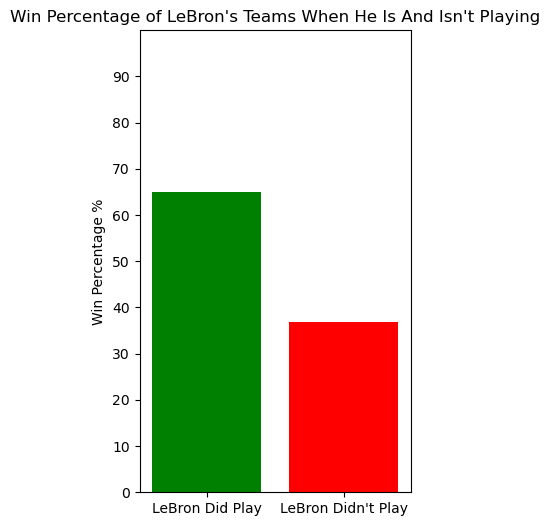

In [96]:
fig, ax = plt.subplots(figsize=(3.5,6))
plt.title("Win Percentage of LeBron's Teams When He Is And Isn't Playing")
ax.bar(["LeBron Did Play", "LeBron Didn't Play"],
       [findWinPercentage(lebron_did_play),
        findWinPercentage(lebron_didnt_play)
       ],
       color = ['green', 'red']);
ax.set_ylabel("Win Percentage %")
plt.yticks(np.arange(0,100,10));
ax.set_ylim(0,100);

This is further supported by the difference in the margin of victory, found by subtracting LeBron's team's points against the opposing team's points. As seen in the graph below, LeBron's teams on average lose by 4 points when he isn't playing while winning by 4 when he is, an 8 point swing from losing a game to winning.

In [97]:
def findMOV(df):
    marginOfVictory = df['team_pts'] - df['opp_pts']
    return round(marginOfVictory.mean(),2)

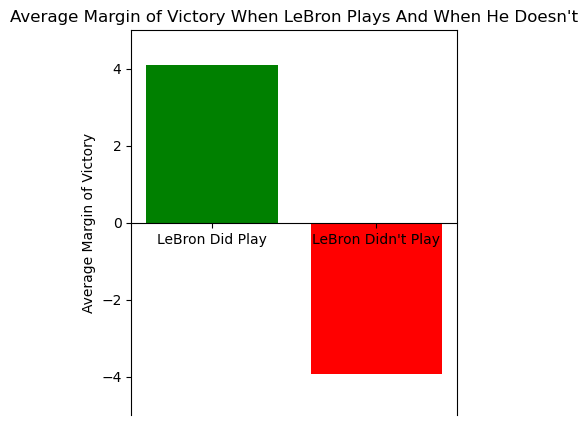

In [98]:
fig, ax = plt.subplots(figsize=(4.2,5))
plt.title("Average Margin of Victory When LeBron Plays And When He Doesn't")
plt.bar(["LeBron Did Play", "LeBron Didn't Play"],
       [findMOV(lebron_did_play), findMOV(lebron_didnt_play)],
       color = ['green', 'red']);
ax.set_ylabel("Average Margin of Victory");
ax.spines['bottom'].set_position('zero');
ax.set_ylim(-5,5);


Finally, this can also be seen when Lebron is playing compared to when he's on a bench in any individual game, which can be seen through the "plus minus" stat which tracks the difference in score when a player is playing or on the bench. As seen below in the totality of his career, when he's on the floor his team has <b>outscored his opponents by 7223 points.</b>

In [99]:
f"LeBron's total plus minus: {merged_df['plus_minus'].sum()}"

"LeBron's total plus minus: 7223"

And on average, when he is on the floor his team has <b>outscored the opponent by an average of 5.08 points.</b>

In [100]:
f"LeBron's average plus minus: {round(merged_df['plus_minus'].sum()/lebron_did_play.shape[0], 2)}"

"LeBron's average plus minus: 5.08"

#### 3.2 Location on LeBron's Impact on Winning

One factor that I wanted to explore was how location affected LeBron's impact and whether there was a significant difference in the difference in win percentage based on whether the game was played at home or at an opponent's stadium. 

In [101]:
#LeBron is playing and his team is in their home stadium
findWinPercentage(lebron_did_play[lebron_did_play.game_location.eq('Home')])

74.48

In [102]:
#LeBron isn't playing and his team is in their home stadium
findWinPercentage(lebron_didnt_play[lebron_didnt_play.game_location.eq('Home')])

50.0

In [103]:
#LeBron is playing and his team is in an opponent's stadium
findWinPercentage(lebron_did_play[lebron_did_play.game_location.eq('Away')])

55.29

In [104]:
#LeBron isn't playing and his team is in an opponent's stadium
findWinPercentage(lebron_didnt_play[lebron_didnt_play.game_location.eq('Away')])

26.47

As seen in the numbers above and the figure below, there is a drastic difference in the impact of LeBron at home as opposed to playing away. At home their win percentage goes from 74% to 50% with and without Lebron, while away, the decrease in win percentage goes down more than half from 55% to 26%. This follows logically, as in basketball the performance of the "role players" are far more affected by the crowd, which could explain why LeBron's teams are able to cope better without him at home.

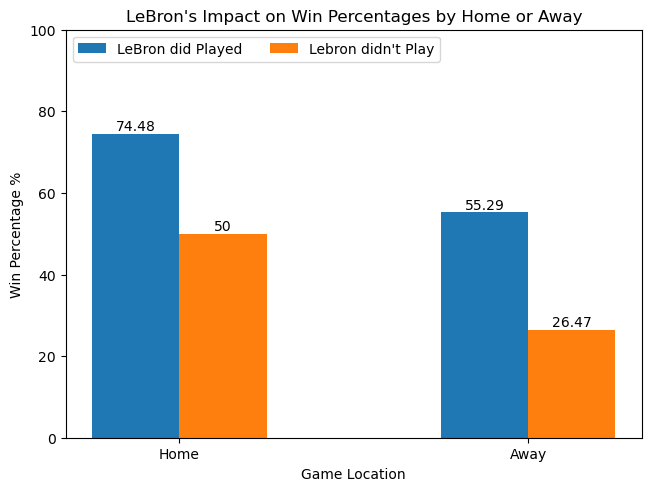

In [105]:
location = ("Home", "Away")
win_percentages = {
"LeBron did Played": (findWinPercentage(lebron_did_play[lebron_did_play.game_location.eq('Home')]),
          findWinPercentage(lebron_did_play[lebron_did_play.game_location.eq('Away')])
          ),
"Lebron didn't Play": (findWinPercentage(lebron_didnt_play[lebron_didnt_play.game_location.eq('Home')]),
                          findWinPercentage(lebron_didnt_play[lebron_didnt_play.game_location.eq('Away')]))
}

x = np.arange(len(location))  # label locations 
width = 0.25  # the width of the bars
multiplier = 0.5 #multiplier to place the xticks in the middle of the two bars

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in win_percentages.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage %')
ax.set_xlabel("Game Location")
ax.set_title("LeBron's Impact on Win Percentages by Home or Away")
ax.set_xticks(x + width, location)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100);


#### 3.3 Box Score Differences 

Finally, I wanted to see the difference in LeBron's team's and opponent's box score when he is and isn't playing. 

In [106]:
for col in lebron_did_play.columns:
    if ("team" in col or "opp" in col):
        try:
            print(col,":", round(lebron_did_play[col].mean() - lebron_didnt_play[col].mean(),2))
        except:
            continue

team_pts : 0.41
opp_pts : -7.61
team_fg : 0.6
team_fga : -3.03
team_fg_pct : 0.0
team_fg3 : -1.35
team_fg3a : -5.07
team_fg3_pct : 0.0
team_ft : 0.57
team_fta : 0.93
team_ft_pct : -0.0
team_orb : -0.08
team_trb : -1.12
team_ast : 0.21
team_stl : 0.3
team_blk : 0.5
team_tov : -1.24
team_pf : 0.57
opp_fg : -2.72
opp_fga : -3.23
opp_fg_pct : 0.0
opp_fg3 : -2.51
opp_fg3a : -6.89
opp_fg3_pct : 0.0
opp_ft : 0.34
opp_fta : 0.13
opp_ft_pct : 0.0
opp_orb : 0.43
opp_trb : -2.83
opp_ast : -2.51
opp_stl : -0.94
opp_blk : -0.8
opp_tov : 0.24
opp_pf : 0.6


As seen in the values above, when LeBron doesnt play,  for his teams there doesn't seem to be a big difference except the significant rise in both field goal and three point attempts, however this might be due to the fact that Lebron started missing more games later in his career where three point shots became more relevant. The difference can be seen more clearly in how the opponent actually plays, as when LeBron doesn't play the opponent scores more field goals, threes, and gets more rebounds, assists, blocks and steals. It is worth noting that these numbers are only a difference of 1-6 spread throughout an entire team.

#### 3.4 LeBron's Impact Over Time

LeBron has played 20 season from the age of 18 to 38, meaning he has been in the NBA for more than half of his life. Naturally, in a physical sport like basketball, age is a big factor in the performance and quality of a player due to its effects on endurance, strength and numerous other physical and mental capabilities. As LeBron continues his 21st season and most likely many more, I wanted to analyze how his impact has changed over time.

I first wanted to see how LeBron's teams' win percentage has changed season to season over his 20 year career

#### 3.4.1 LeBron's Win Percentage by Season

In [107]:
#list comprehension to make win percentage list by season
seasons = merged_df['season'].unique()
wp = [findWinPercentage(merged_df[merged_df.season.eq(season)]) for season in seasons]

Below is a graph representing the average win percentage of LeBron's teams by season

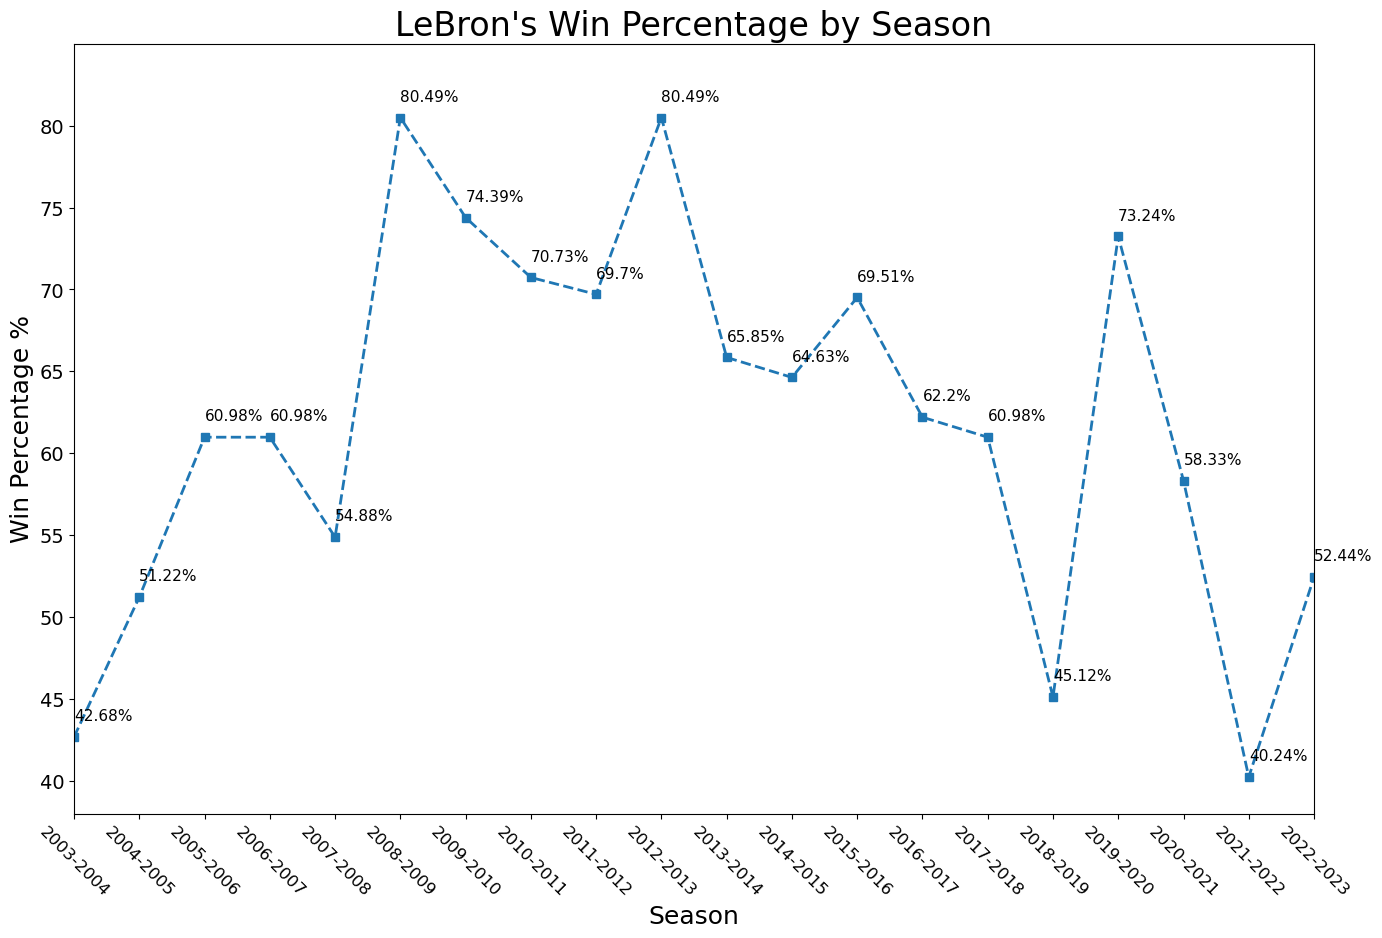

In [108]:
fig, ax = plt.subplots(figsize=(16,10))
plt.title("LeBron's Win Percentage by Season", fontsize=24)

ax.plot(seasons, wp,
        linewidth=2, linestyle='--',
        marker="s")
plt.xticks(rotation = 315, fontsize = 12);
plt.yticks(np.arange(40,85,5), fontsize=14)

plt.ylim(38,85)
plt.xlim('2003-2004', '2022-2023');

ax.set_xlabel('Season', fontsize=18);
ax.set_ylabel('Win Percentage %', fontsize=18);

for x,y,text in zip(seasons, wp, wp):
    plt.annotate(text=f"{text}%", xy=(x,y +1), fontsize=11)

LeBron's teams seem to have the highest win percentage between the 2009-2010 and the 2016-17 seasons.There was a large spike during the 2019-2020 season when LeBron was 35 and on the Lakers, but this can be seen as an outlier due to the much lower win percentages following that season, which follows better with the trend of decline starting from 2015-2016. 

#### 3.4.2 LeBron's team Before, With, and After Him

Over his 20 year career, LeBron has changed teams a total of three times, however he moved away then back to the same team, so for this project's sake I will call it four teams. The first thing I wanted to see was how LeBron being on the actual team itself, regardless of whether or not he played, affected the win percentage of his teams by comparing the average win percentage of his stint with one team and comparing it with the win percentages of that team a year before and after LeBron was there.

First I'm going to define a function that creates dataframes from game logs, since I will be doing this numerous times.

In [109]:
def makeGLDF(years, team):
    gldf = {}
    for year in years:
        link = f"https://www.basketball-reference.com/teams/{team}/{year}/gamelog/"
        soup = get_soup(link)
        rows = get_rows(soup)
        for row in rows:
            for data in row.find_all('td'):
                #initialize the key  as an empty array if it wasn't in the dictionary yet
                if data['data-stat'] not in gldf.keys():
                    gldf[data['data-stat']] = []
                #appends the data stat to the corresponding key's array
                gldf[data['data-stat']].append(data.text)
    return pd.DataFrame(gldf)

Next Im going to define 4 lists for LeBron's 4 different teams, and each list will have his team's win percentage before, during, and after his time with them.

In [110]:
cleI = [
    findWinPercentage(makeGLDF([2003], 'CLE')),
    findWinPercentage(merged_df[merged_df['season'] < "2010-2011"]),
    findWinPercentage(makeGLDF([2011], 'CLE'))
]

In [111]:
Mia = [
    findWinPercentage(makeGLDF([2010], 'MIA')),
    findWinPercentage(merged_df[merged_df['team'] == 'MIA']),
    findWinPercentage(makeGLDF([2015], 'MIA'))
]

In [112]:
cleII = [
    findWinPercentage(makeGLDF([2014], 'CLE')),
    findWinPercentage(merged_df[merged_df['season'] >= "2014-2015"][merged_df['team'] == 'CLE']),
    findWinPercentage(makeGLDF([2019], 'CLE'))
]

C:\Users\Divo\AppData\Local\Temp\ipykernel_37472\1833825532.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  findWinPercentage(merged_df[merged_df['season'] >= "2014-2015"][merged_df['team'] == 'CLE']),


In [113]:
Lal = [
    findWinPercentage(makeGLDF([2018], 'LAL')),
    findWinPercentage(merged_df[merged_df['team'] == 'LAL'])
]

In [114]:
##labels list for the x axis
labels = ['Before', 'During', 'After']

Below are the graphs representing the difference in win percentage before, after and during LeBron's time with the team. From the data below it can be seen that in every team he has been on their average  win percentage always increases when LeBron enters the team, and always decreases the year immediately after he leaves.

<BarContainer object of 2 artists>

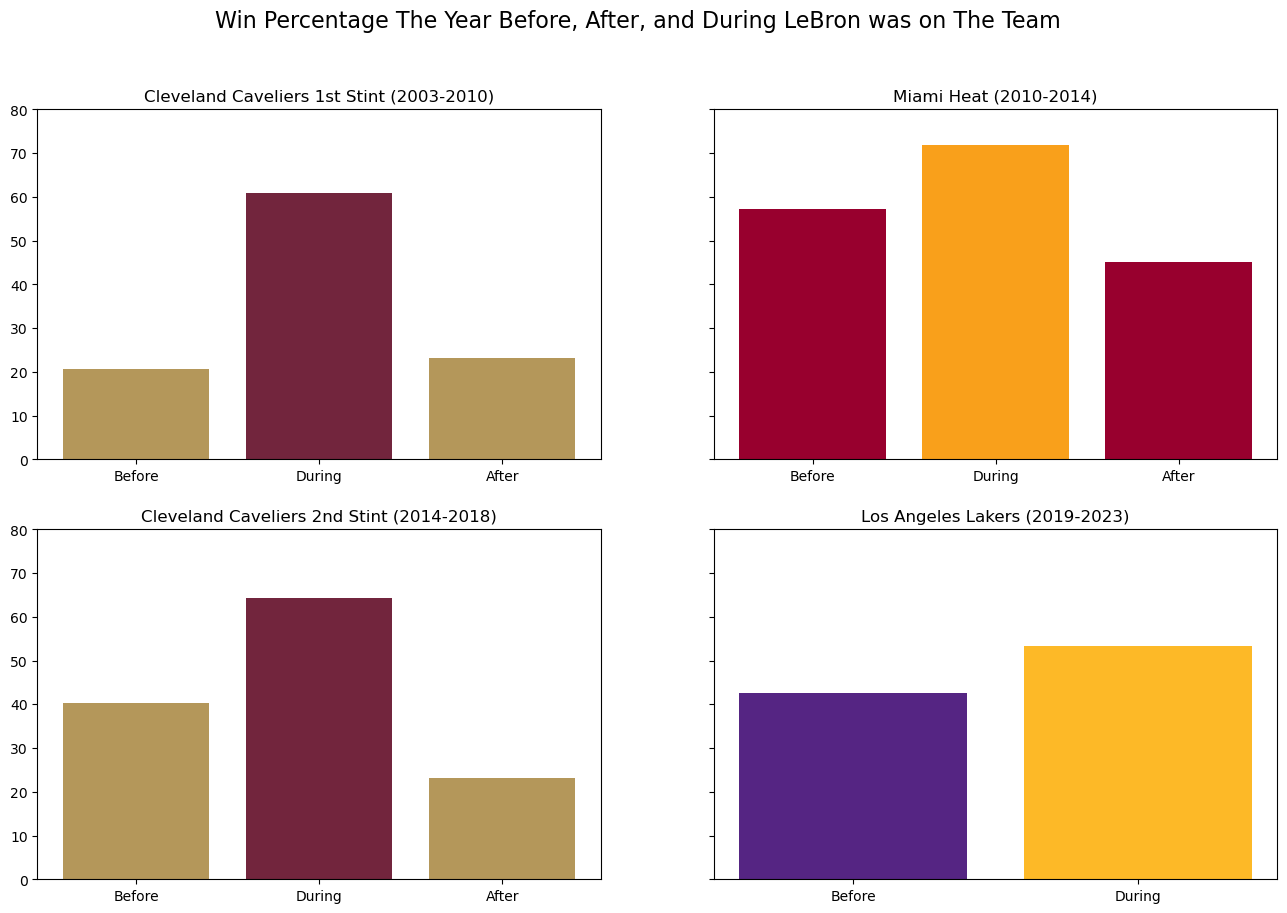

In [115]:
# making a 2x2 subplot since there are four graphs that share the same y axis and display similar data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16,10), sharey=True)
fig.suptitle("Win Percentage The Year Before, After, and During LeBron was on The Team", fontsize=16)

#labels as the x axis, team win percentage as the y, and the bars are color coded according to the team's primary colors
ax1.bar(labels, cleI, color=["#b4975a", "#72253d"])
ax1.title.set_text('Cleveland Caveliers 1st Stint (2003-2010)')
ax2.bar(labels, Mia, color=['#98002E', '#F9A01B'])
ax2.set_ylim(0,80)
ax2.title.set_text('Miami Heat (2010-2014)')
ax3.title.set_text('Cleveland Caveliers 2nd Stint (2014-2018)')
ax3.bar(labels, cleII, color=["#b4975a", "#72253d"])
ax4.title.set_text('Los Angeles Lakers (2019-2023)')
ax4.bar(['Before', 'During'], Lal, color=["#552583", "#FDB927"])

This could be due to LeBron's presence changing the outlook of a team from rebuilding to contending, changing their moves to acquire better players, and what their goals are in each individual season. This graph shows that his impact on winning goes beyond what happens on the court, but also how him being a player on the team increases their winning. 


By team, LeBron's win percentage seemed to peak with his time in the Miami Heat and his second stint with the Cleveland Cavaliers, which makes sense due to this being not just during the time of his physical prime, but also when he won 3 out of 4 of his championships. 

It is also interesting to note the decline of his impact as he has aged, with only a ~10% difference in his time with the Lakers, compared to the ~20-50% with his previous teams, possibly indicating a declining impact or influence that LeBron has as he has aged.

#### 3.4.3 LeBron's Change in Performance Over Time

From the graph in 3.4.1 it can be seen that LeBron's average win percentage has decreased as he has gotten older, and from 3.4.2 that his impact on winning on the team has also decreased. I now wanted to see how LeBron's performance has changed by season.

First I defined a function that returns a list with the averages of a particular stat by season

In [116]:
def findAverageStats(stat):
    if stat == 'LBPlayed':
        return [lebron_did_play[lebron_did_play.season.eq(season)][stat].sum() for season in seasons]
    return [lebron_did_play[lebron_did_play.season.eq(season)][stat].mean().round(1) for season in seasons]

And below I decided to plot six of the available and most relevant box score statistics that are available in the dataframe that we created to track how LeBron's average box score numbers have changed by season. 

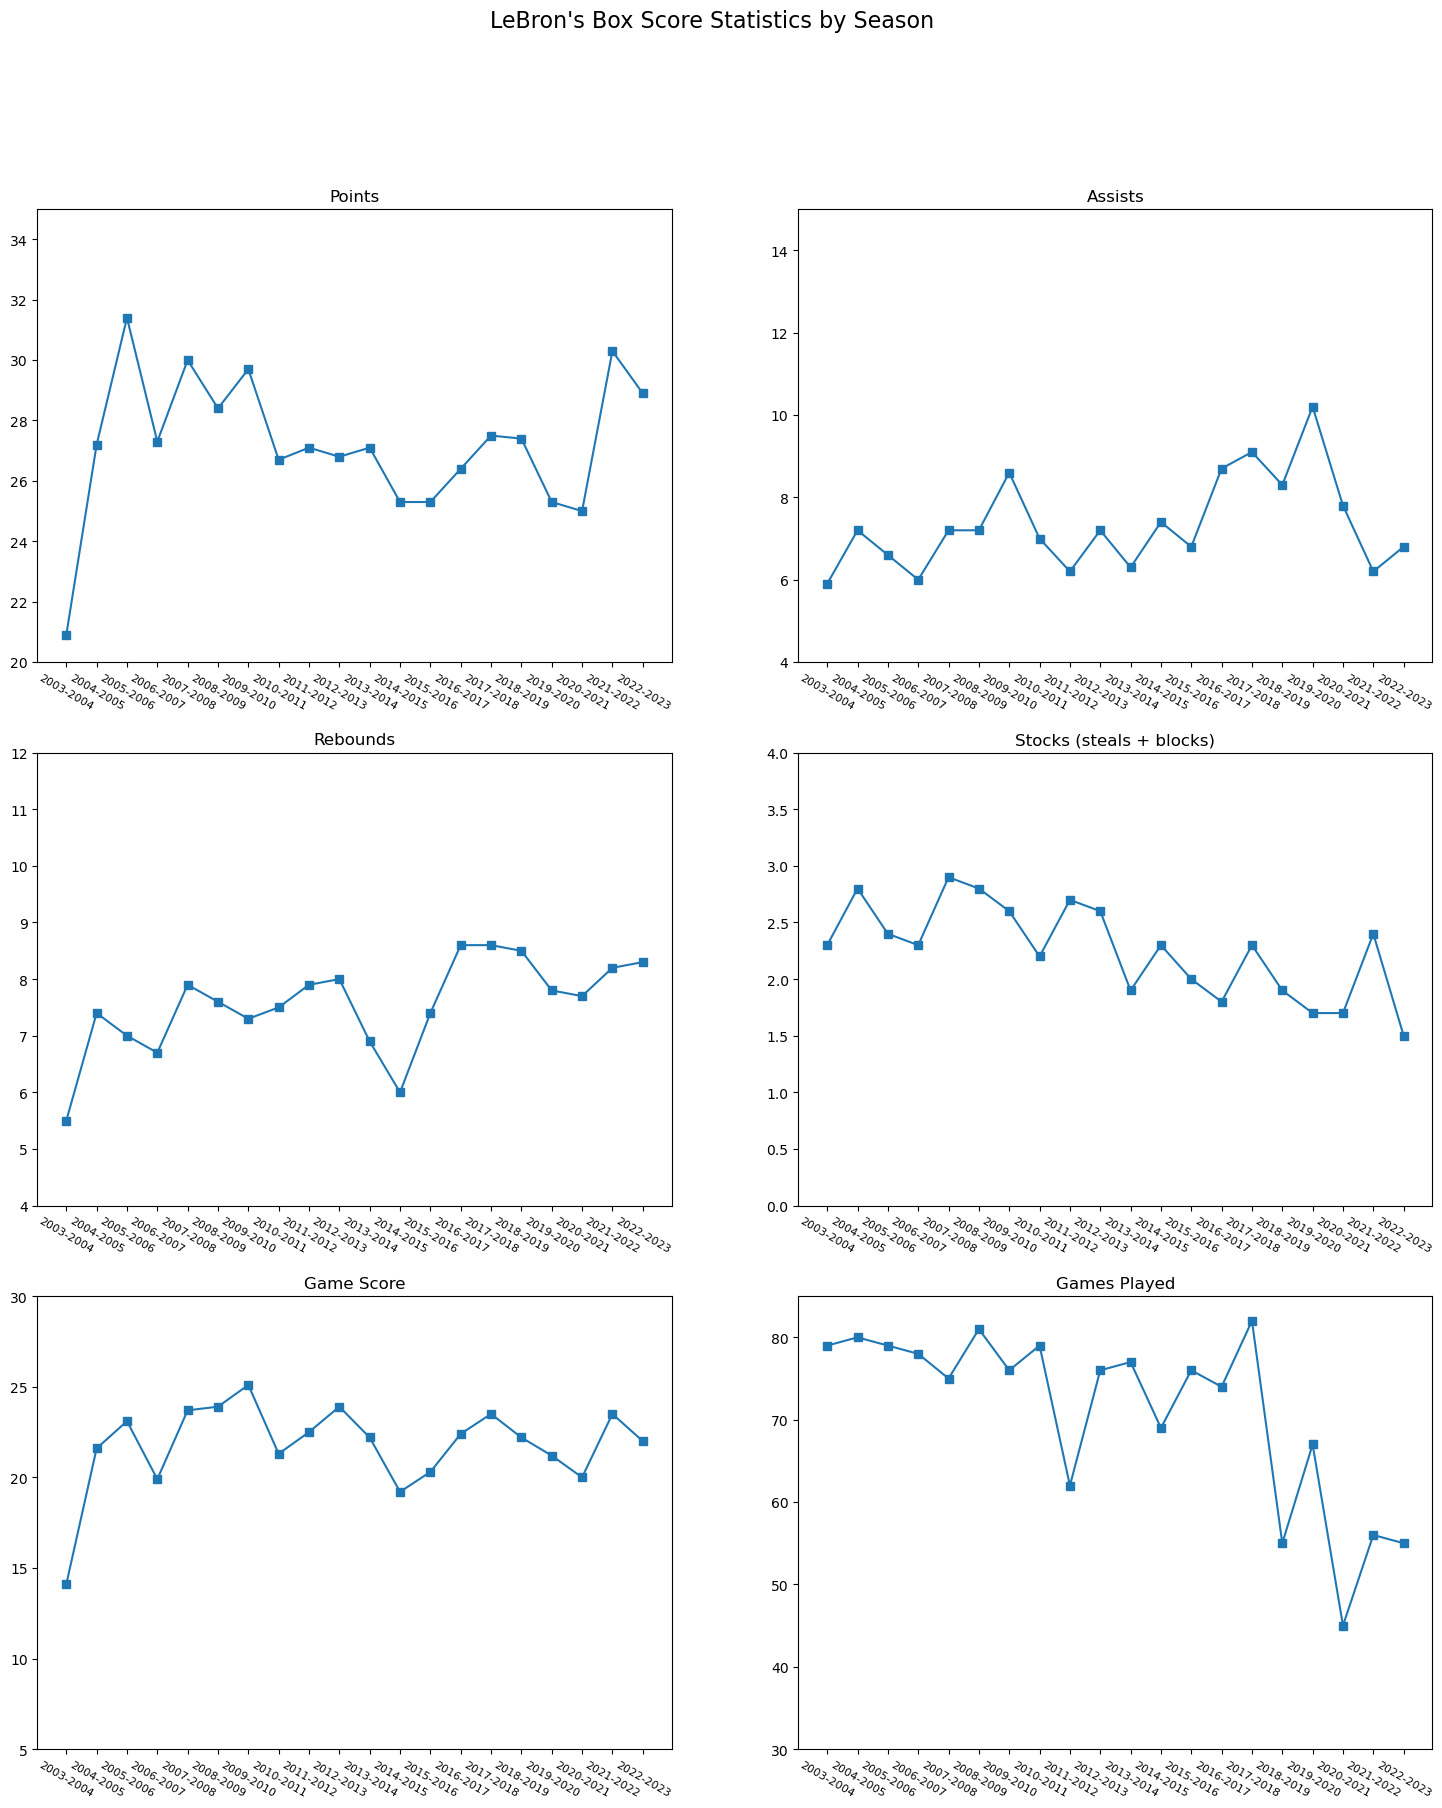

In [117]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2, figsize = (18,20))
fig.suptitle("LeBron's Box Score Statistics by Season", fontsize=16)
ax1.title.set_text('Points')
ax1.plot(seasons, findAverageStats('pts'), marker='s')
ax1.tick_params(labelrotation=330, labelsize=8, axis='x')
ax1.set_ylim(20, 35);

ax2.title.set_text('Assists')
ax2.plot(seasons, findAverageStats('ast'), marker='s')
ax2.tick_params(labelrotation=330, labelsize=8, axis='x'  )
ax2.set_ylim(4, 15);

ax3.title.set_text('Rebounds')
ax3.plot(seasons, findAverageStats('trb'), marker='s')
ax3.tick_params(labelrotation=330, labelsize=8, axis='x' )
ax3.set_ylim(4, 12);

ax4.title.set_text('Stocks (steals + blocks)')
ax4.plot(seasons, np.add(findAverageStats('stl'),findAverageStats('blk')), marker='s')
ax4.tick_params(labelrotation=330, labelsize=8, axis='x' )
ax4.set_ylim(0, 4);

ax5.title.set_text('Game Score')
ax5.plot(seasons, findAverageStats('game_score'), marker='s')
ax5.tick_params(labelrotation=330, labelsize=8, axis='x' )
ax5.set_ylim(5, 30);

ax6.title.set_text('Games Played')
ax6.plot(seasons, findAverageStats('LBPlayed'), marker='s')
ax6.tick_params(labelrotation=330, labelsize=8, axis='x' )
ax6.set_ylim(30, 85);

From the graphs above it can be seen that in terms of points, rebounds, assists, and game score, LeBron has been consistently putting up the same numbers season by season with only a few dips in an otherwise stable statline. However there is a very noticable decline in both games played and stocks. From these observations one could make the assumption that LeBron's declining impact could be due to his decline in defensive ability or effort as he's gotten older, or simply the fact that he's available to play less games and therefore unable to impact his team's overall winning as much.

This can be further explored by seeing the r correlation coeffecient of the values in games played as well as stocks with the number of years LeBron has been in the league. 

In [118]:
# an array with a range of 20 numbers from 1-20 to represent each year he's been in the nba
years = np.arange(1,21)

In [119]:
#use numpy's correlation coefficient function to find the r for both games played and stocks
games_played_r = np.corrcoef(years, findAverageStats('LBPlayed'))[0][1].round(3)
stocks_r = np.corrcoef(years, np.add(findAverageStats('stl'),findAverageStats('blk')))[0][1].round(3)
print(f'The correlation coeffecient for the number of games played with years played is {games_played_r}')
print(f'The correlation coeffecient for the number of stocks with years played is {stocks_r}')

The correlation coeffecient for the number of games played with years played is -0.718
The correlation coeffecient for the number of stocks with years played is -0.696


The results above further confirm this decline by showing a <b>strong negative correlation</b> for both statistics 

<b>3.4.4 Impact of LeBron's Individual Performance on his Team's </b>

Finally, I wanted to explore the impact that LeBron's individual performance has on his team's. To explore this, I compared LeBron's average plus minus, a metric used to track his team's point differential when he's on the court, and his team's average margin of victory by season.

First I created a list using list comprehension of LeBron's team's average margin of victory by season

In [120]:
mov = [findMOV(merged_df[merged_df.season.eq(season)]) for season in seasons]

Then I superimposed both the average margin of victory and LeBron's average plus minus by season to visualize the relationship between the two.

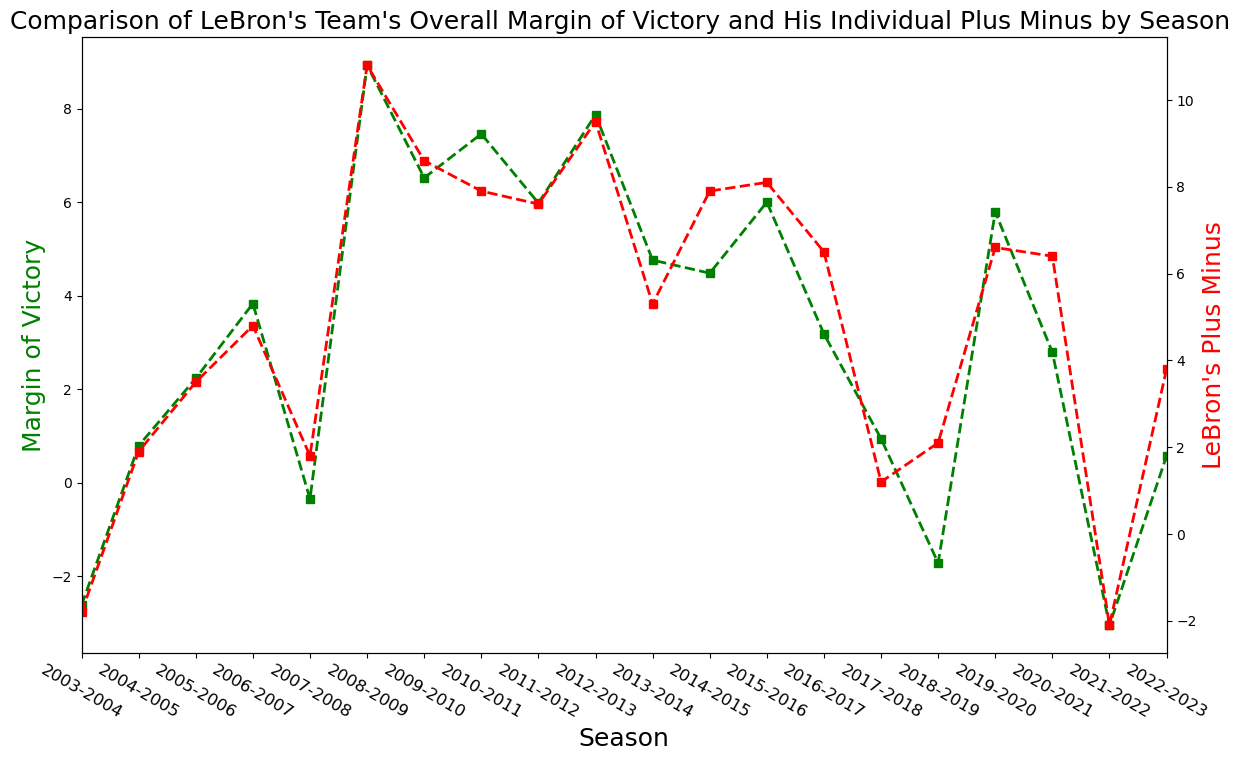

In [129]:
fig, ax = plt.subplots(figsize=(14,8))
ax = plt.gca()
ax2 = ax.twinx()
plt.title("Comparison of LeBron's Team's Overall Margin of Victory and His Individual Plus Minus by Season ", fontsize=18)
ax.plot(seasons, mov,
        linewidth=2, linestyle='--',
        marker="s", color='green')
ax.tick_params(labelrotation=330, labelsize=12, axis='x')
ax2.plot(seasons, findAverageStats('plus_minus'), color='red', linewidth=2, linestyle='--',
        marker="s",)
plt.xlim('2003-2004', '2022-2023');
ax.set_xlabel('Season', fontsize=18);
ax.set_ylabel('Margin of Victory', fontsize=18, color='green');
ax2.set_ylabel("LeBron's Plus Minus", fontsize=18, color ='red');

As seen from the graph above, there is a <b>very close</b> relationship between the two. It can be observed that LeBron's performance, measured by his point differential on the court, has a great impact on the the team's margin of victory, winning and losing by very similar amounts every season.

To further solidify this relationship I found the r correlation coeffecient between the average margin of victory and LeBron's average plus minus by season, which as seen below is an astoundingly positive relationship.

In [122]:
pm_mov_r = np.corrcoef(mov, findAverageStats('plus_minus'))[0][1].round(3)
print(f"The correlation coeffecient between  the average margin of victory and LeBron's average plus minus by season is {pm_mov_r}")

The correlation coeffecient between  the average margin of victory and LeBron's average plus minus by season is 0.95


## 6 Summary

### 6.1 Conclusion

Through the exploratory data analysis done on the data scraped in this project, including the game logs of both LeBron James and his teams, we have been able to see that LeBron James has been incredibly impactful throughout his career, with his teams consistently winning more with than without him, however that this impact has declined as he's aging away from his physical prime. 

To truly put it in proper perspective however, a future project could use the data gathered and analyzed in this project and compare it with other similar players or legends equal in popularity and stardom as LeBron such as Steph Curry, Kevin Durant, or Kobe Bryant.

### 6.2 Summary of Prepared Data

Team Games Dataframe

In [123]:
team_games_df.head()

,game_season,season,team,date_game,game_location,opp_id,game_result,team_pts,opp_pts,team_fg,...,opp_ft,opp_fta,opp_ft_pct,opp_orb,opp_trb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,1,2003-2004,CLE,2003-10-29,Away,SAC,L,92,106,40,...,16,20,0.800,13,41,27,7,8,10,11
1,2,2003-2004,CLE,2003-10-30,Away,PHO,L,86,95,37,...,27,38,0.711,11,43,16,8,7,12,15
2,3,2003-2004,CLE,2003-11-01,Away,POR,L,85,104,35,...,22,29,0.759,8,38,27,7,3,12,22
3,4,2003-2004,CLE,2003-11-05,Home,DEN,L,89,93,33,...,10,18,0.556,13,42,17,10,7,14,24
4,5,2003-2004,CLE,2003-11-07,Away,IND,L,90,91,36,...,19,25,0.760,10,41,23,8,7,7,20


In [124]:
team_games_df.columns

Index(['game_season', 'season', 'team', 'date_game', 'game_location', 'opp_id',
       'game_result', 'team_pts', 'opp_pts', 'team_fg', 'team_fga',
       'team_fg_pct', 'team_fg3', 'team_fg3a', 'team_fg3_pct', 'team_ft',
       'team_fta', 'team_ft_pct', 'team_orb', 'team_trb', 'team_ast',
       'team_stl', 'team_blk', 'team_tov', 'team_pf', 'opp_fg', 'opp_fga',
       'opp_fg_pct', 'opp_fg3', 'opp_fg3a', 'opp_fg3_pct', 'opp_ft', 'opp_fta',
       'opp_ft_pct', 'opp_orb', 'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk',
       'opp_tov', 'opp_pf'],
      dtype='object')

LeBron's Dataframe

In [125]:
lebron_df.head()

,date_game,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus
0,2003-10-29,42:50,12.0,20.0,0.600,0.0,2.0,0.0,1.0,3.0,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2003-10-30,40:21,8.0,17.0,0.471,1.0,5.0,0.2,4.0,7.0,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,2003-11-01,39:10,3.0,12.0,0.250,0.0,1.0,0.0,2.0,2.0,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,2003-11-05,41:06,3.0,11.0,0.273,0.0,2.0,0.0,1.0,1.0,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,2003-11-07,43:44,8.0,18.0,0.444,1.0,2.0,0.5,6.0,7.0,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


In [126]:
lebron_df.columns

Index(['date_game', 'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct',
       'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'game_score', 'plus_minus'],
      dtype='object')

Merged Dataframe combining LeBron and his team's dataframes

In [127]:
merged_df.head()

,game_season,season,team,date_game,game_location,opp_id,game_result,team_pts,opp_pts,team_fg,...,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus,LBPlayed
0,1,2003-2004,CLE,2003-10-29,Away,SAC,L,92,106,40,...,6,9,4,0,2,3,25,24,-9,1
1,2,2003-2004,CLE,2003-10-30,Away,PHO,L,86,95,37,...,12,8,1,0,7,1,21,14,-3,1
2,3,2003-2004,CLE,2003-11-01,Away,POR,L,85,104,35,...,4,6,2,0,2,3,8,5,-21,1
3,4,2003-2004,CLE,2003-11-05,Home,DEN,L,89,93,33,...,11,7,2,3,2,1,7,11,-3,1
4,5,2003-2004,CLE,2003-11-07,Away,IND,L,90,91,36,...,5,3,0,0,7,2,23,9,-7,1


In [128]:
merged_df.columns

Index(['game_season', 'season', 'team', 'date_game', 'game_location', 'opp_id',
       'game_result', 'team_pts', 'opp_pts', 'team_fg', 'team_fga',
       'team_fg_pct', 'team_fg3', 'team_fg3a', 'team_fg3_pct', 'team_ft',
       'team_fta', 'team_ft_pct', 'team_orb', 'team_trb', 'team_ast',
       'team_stl', 'team_blk', 'team_tov', 'team_pf', 'opp_fg', 'opp_fga',
       'opp_fg_pct', 'opp_fg3', 'opp_fg3a', 'opp_fg3_pct', 'opp_ft', 'opp_fta',
       'opp_ft_pct', 'opp_orb', 'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk',
       'opp_tov', 'opp_pf', 'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'game_score', 'plus_minus', 'LBPlayed'],
      dtype='object')

## 7 References And Resources

### 7.1 References 

[1] N. M. Abbas (2019, Aug. 14). NBA Data Analytics: Changing the Game [Online]. Available: https://towardsdatascience.com/nba-data-analytics-changing-the-game-a9ad59d1f116 \
[2] B. Taylor (2022, Mar. 16). How is LeBron Still Dominating at 37!? [Online]. Available: https://youtu.be/18uiDuHOn80?si=8zaF5IW23Q_ZAYkJ \
[3] BasketBall Reference(2023, Dec. 4). LeBron James Stats, Height, Weight, Position, Draft ... [Online]. Available:https://www.basketball-reference.com/players/j/jamesle01.html \
[4] Sports Refernce (2023, Dec. 4). Sports Reference Terms of Use [Online]. Available: https://www.sports-reference.com/termsofuse.html 


### 7.2 Resources

#### Webscraping

<ul>
    <li>Webscraping lecture and lab, Dr Sean McGrath</li>
    <li>Crummy (2023, Dec. 4) Beautiful Soup Documentation [Online] Available: https://www.crummy.com/software/BeautifulSoup/bs4/doc/</li>
</ul>

#### Data cleaning and processing, feature generation

<ul>
    <li>Natural Language Processing lab, Dr Sean McGrath</li>
    <li>Pandas (2023, Dec. 4) Pandas Documentation [Online]. Available: https://pandas.pydata.org/docs/</li>
</ul>

#### Exploratory data analysis

<ul>
    <li>Matplotlib (2023, Dec. 4) Matplotlib Documentation [Online]. Available: https://matplotlib.org/stable/index.html</li>
</ul>